In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import pandas as pd
from zipfile import ZipFile

### hw4 Jiajing Chen

# Question 1 Exploratory Data Analysis

* From example/input/ load compustat.csv inside compustat.zip  without unzip compustat.zip
* 1. Variable names that we are interested in:
    * sic code: four digits integer for company
    * datecqtr: year/ quarter time for the record
    * cusip: compustats identifier for a company
    * chod: shares out of standing (in million)
    * saleq: sales of current quarter (in million)
    * prccq: close price of current quarter (in dollar)
    
* 2. For saleq and market cap, compute the following:
    * Time series mean 
    * Time Series standard deviation
    * Time Series count of missing values
    * Time Series ratio of missing values
    * Aggregate the result in a dataframe
        
* 3. Answer the following questions:
    * Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
    * Implement some schemes to detect outliers.
    * Do you find some outliers? Could you think why? You can do some research using google.
    * What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

In [6]:
#read input from zip file:

zip = ZipFile('/Users/jiajing/Desktop/Baruch-MFE-2020/Python/python-workshop/session4/example/input/compustat.zip','r')
df_ = pd.read_csv(zip.open('compustat.csv'))

In [7]:
df_.shape

(1811299, 17)

In [8]:
df_.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [9]:
df = df_.copy()
df = df.loc[:,['sic','datacqtr','cusip','cshoq','saleq','prccq']]
#add market cap col
df['market_cap'] = df['cshoq'] * df['prccq'] 

* 2. For saleq and market cap, compute the following:
    * Time series mean 
    * Time Series standard deviation
    * Time Series count of missing values
    * Time Series ratio of missing values
    * Aggregate the result in a dataframe

In [10]:
# aggregation:
df[['saleq', 'market_cap']].mean()


saleq          445.150664
market_cap    2057.473104
dtype: float64

In [11]:
df[['saleq', 'market_cap']].std()

saleq          2679.706576
market_cap    13202.197457
dtype: float64

In [12]:
np.isnan(df[['saleq', 'market_cap']]).sum()

saleq         269498
market_cap    468276
dtype: int64

In [13]:
np.isnan(df[['saleq', 'market_cap']]).mean()

saleq         0.148787
market_cap    0.258530
dtype: float64

In [14]:
agg_df = pd.DataFrame({'mean': df[['saleq', 'market_cap']].mean(), 
                       'std':df[['saleq', 'market_cap']].std(), 
                      'count_missing': np.isnan(df[['saleq', 'market_cap']]).sum(),
                       'ratio_missing':np.isnan(df[['saleq', 'market_cap']]).mean()
                      })
agg_df

,mean,std,count_missing,ratio_missing
saleq,445.150664,2679.706576,269498,0.148787
market_cap,2057.473104,13202.197457,468276,0.258530


In [15]:
import matplotlib.pyplot as plt

        
* 3. Answer the following questions:
    * Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
    * Implement some schemes to detect outliers.
    * Do you find some outliers? Could you think why? You can do some research using google.
    * What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.
  
ANS:
I will do a general plot of the time series, boxplot of each variables
yes there are outliers. For saleq there are outlier < 0 , and > 150,000. For market_cap there are outliers > 12000000.
Because the returns is lognormal with long tail.
conclusion:



<Figure size 432x288 with 0 Axes>

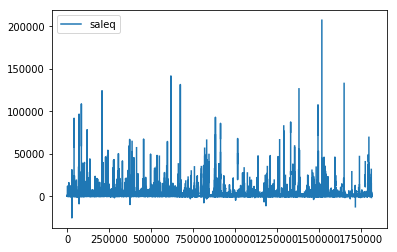

In [16]:
fig = plt.figure()
plt.figsize=(10,5)
df[['saleq']].plot()
plt.show()

<Figure size 432x288 with 0 Axes>

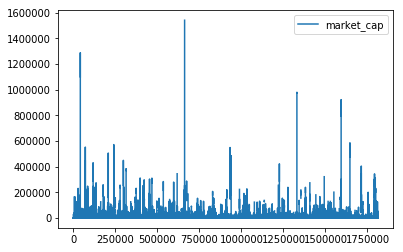

In [17]:
fig = plt.figure()
plt.figsize=(10,5)
df[[ 'market_cap']].plot()
plt.show()

### boxplot:

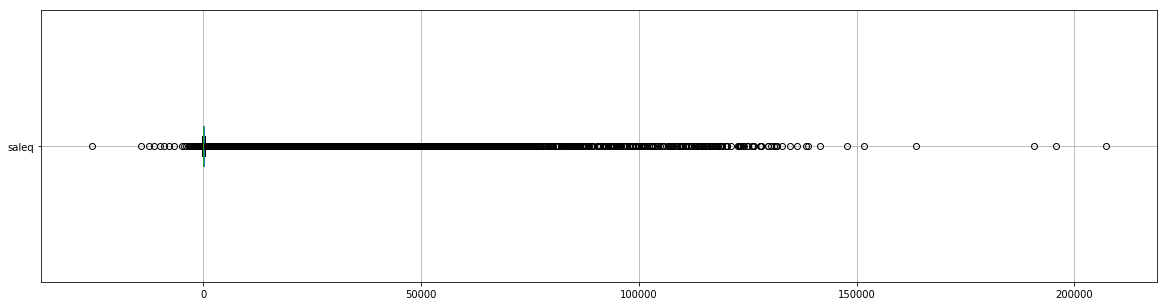

In [18]:
df.boxplot(column = ["saleq"], vert = False, figsize = (20,5))
plt.show()

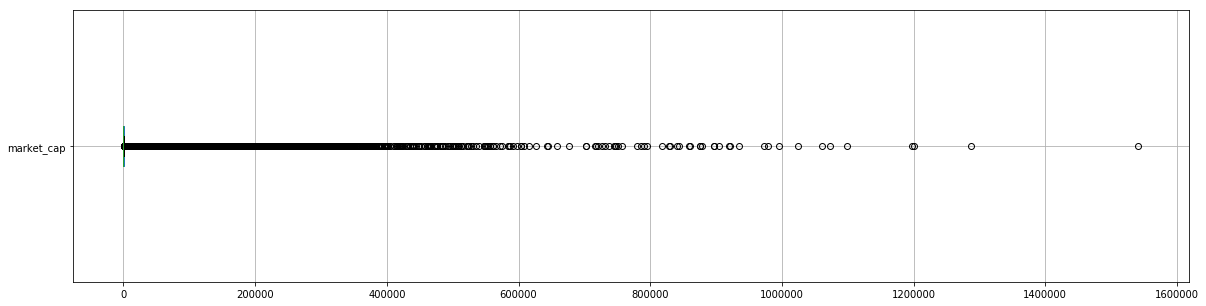

In [19]:
df.boxplot(column = ["market_cap"], vert = False, figsize = (20,5))
plt.show()

# Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [20]:
data = df
data["sic"] = data["sic"].astype(str).str[:2]
data['mktcap_sum'] = data.groupby(['sic', 'datacqtr']).market_cap.transform('sum')
data['mktshare'] = data['market_cap'] / data['mktcap_sum'] * 100
data['mktshare_square'] = data['mktshare'] * data['mktshare']
data['hhi'] = data.groupby(['sic', 'datacqtr']).mktshare_square.transform('sum')

In [21]:
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,market_cap,mktcap_sum,mktshare,mktshare_square,hhi
0,30,1966Q1,000032102,0.219,NaN,NaN,NaN,18.600000,NaN,NaN,10000.000000
1,30,1966Q2,000032102,0.219,NaN,NaN,NaN,18.000000,NaN,NaN,10000.000000
2,30,1966Q3,000032102,0.219,NaN,NaN,NaN,18.600000,NaN,NaN,10000.000000
3,30,1966Q4,000032102,0.219,4.032,NaN,NaN,101.584933,NaN,NaN,4347.748752
4,30,1967Q1,000032102,0.277,NaN,NaN,NaN,716.307625,NaN,NaN,3110.908884


In [22]:
#mean hhi per ic:
agg_hhi_df = data.groupby(["sic"])["hhi"].mean().reset_index()

In [23]:
agg_hhi_df = agg_hhi_df.sort_values("hhi", ascending = False)

In [24]:
agg_hhi_df.head(4)

,sic,hhi
61,81,8777.099983
64,84,7840.095081
65,86,7826.086957
28,41,6753.094231


So the Industries are sic 81, 84, 86,41

In [25]:
sic_list = agg_hhi_df.head(4).sic.tolist()

In [26]:
#group by per qtr for top 4 hhi:
top_df = data[data.sic.isin(sic_list)].groupby(["sic", "datacqtr"])["hhi"].mean().reset_index()
df_pivot = top_df.pivot(index = "datacqtr", columns = "sic", values = "hhi").reset_index()

In [27]:
df_pivot 

sic,datacqtr,41,81,84,86
0,1981Q1,0.000000,NaN,NaN,NaN
1,1981Q2,0.000000,NaN,NaN,NaN
2,1981Q3,0.000000,NaN,NaN,NaN
3,1981Q4,10000.000000,NaN,0.0,NaN
4,1982Q1,10000.000000,NaN,0.0,NaN
...,...,...,...,...,...
152,2019Q1,9298.837834,10000.000000,NaN,NaN
153,2019Q2,4220.324942,9704.936241,NaN,NaN
154,2019Q3,6764.254738,10000.000000,NaN,NaN
155,2019Q4,4001.708622,9581.071999,NaN,NaN


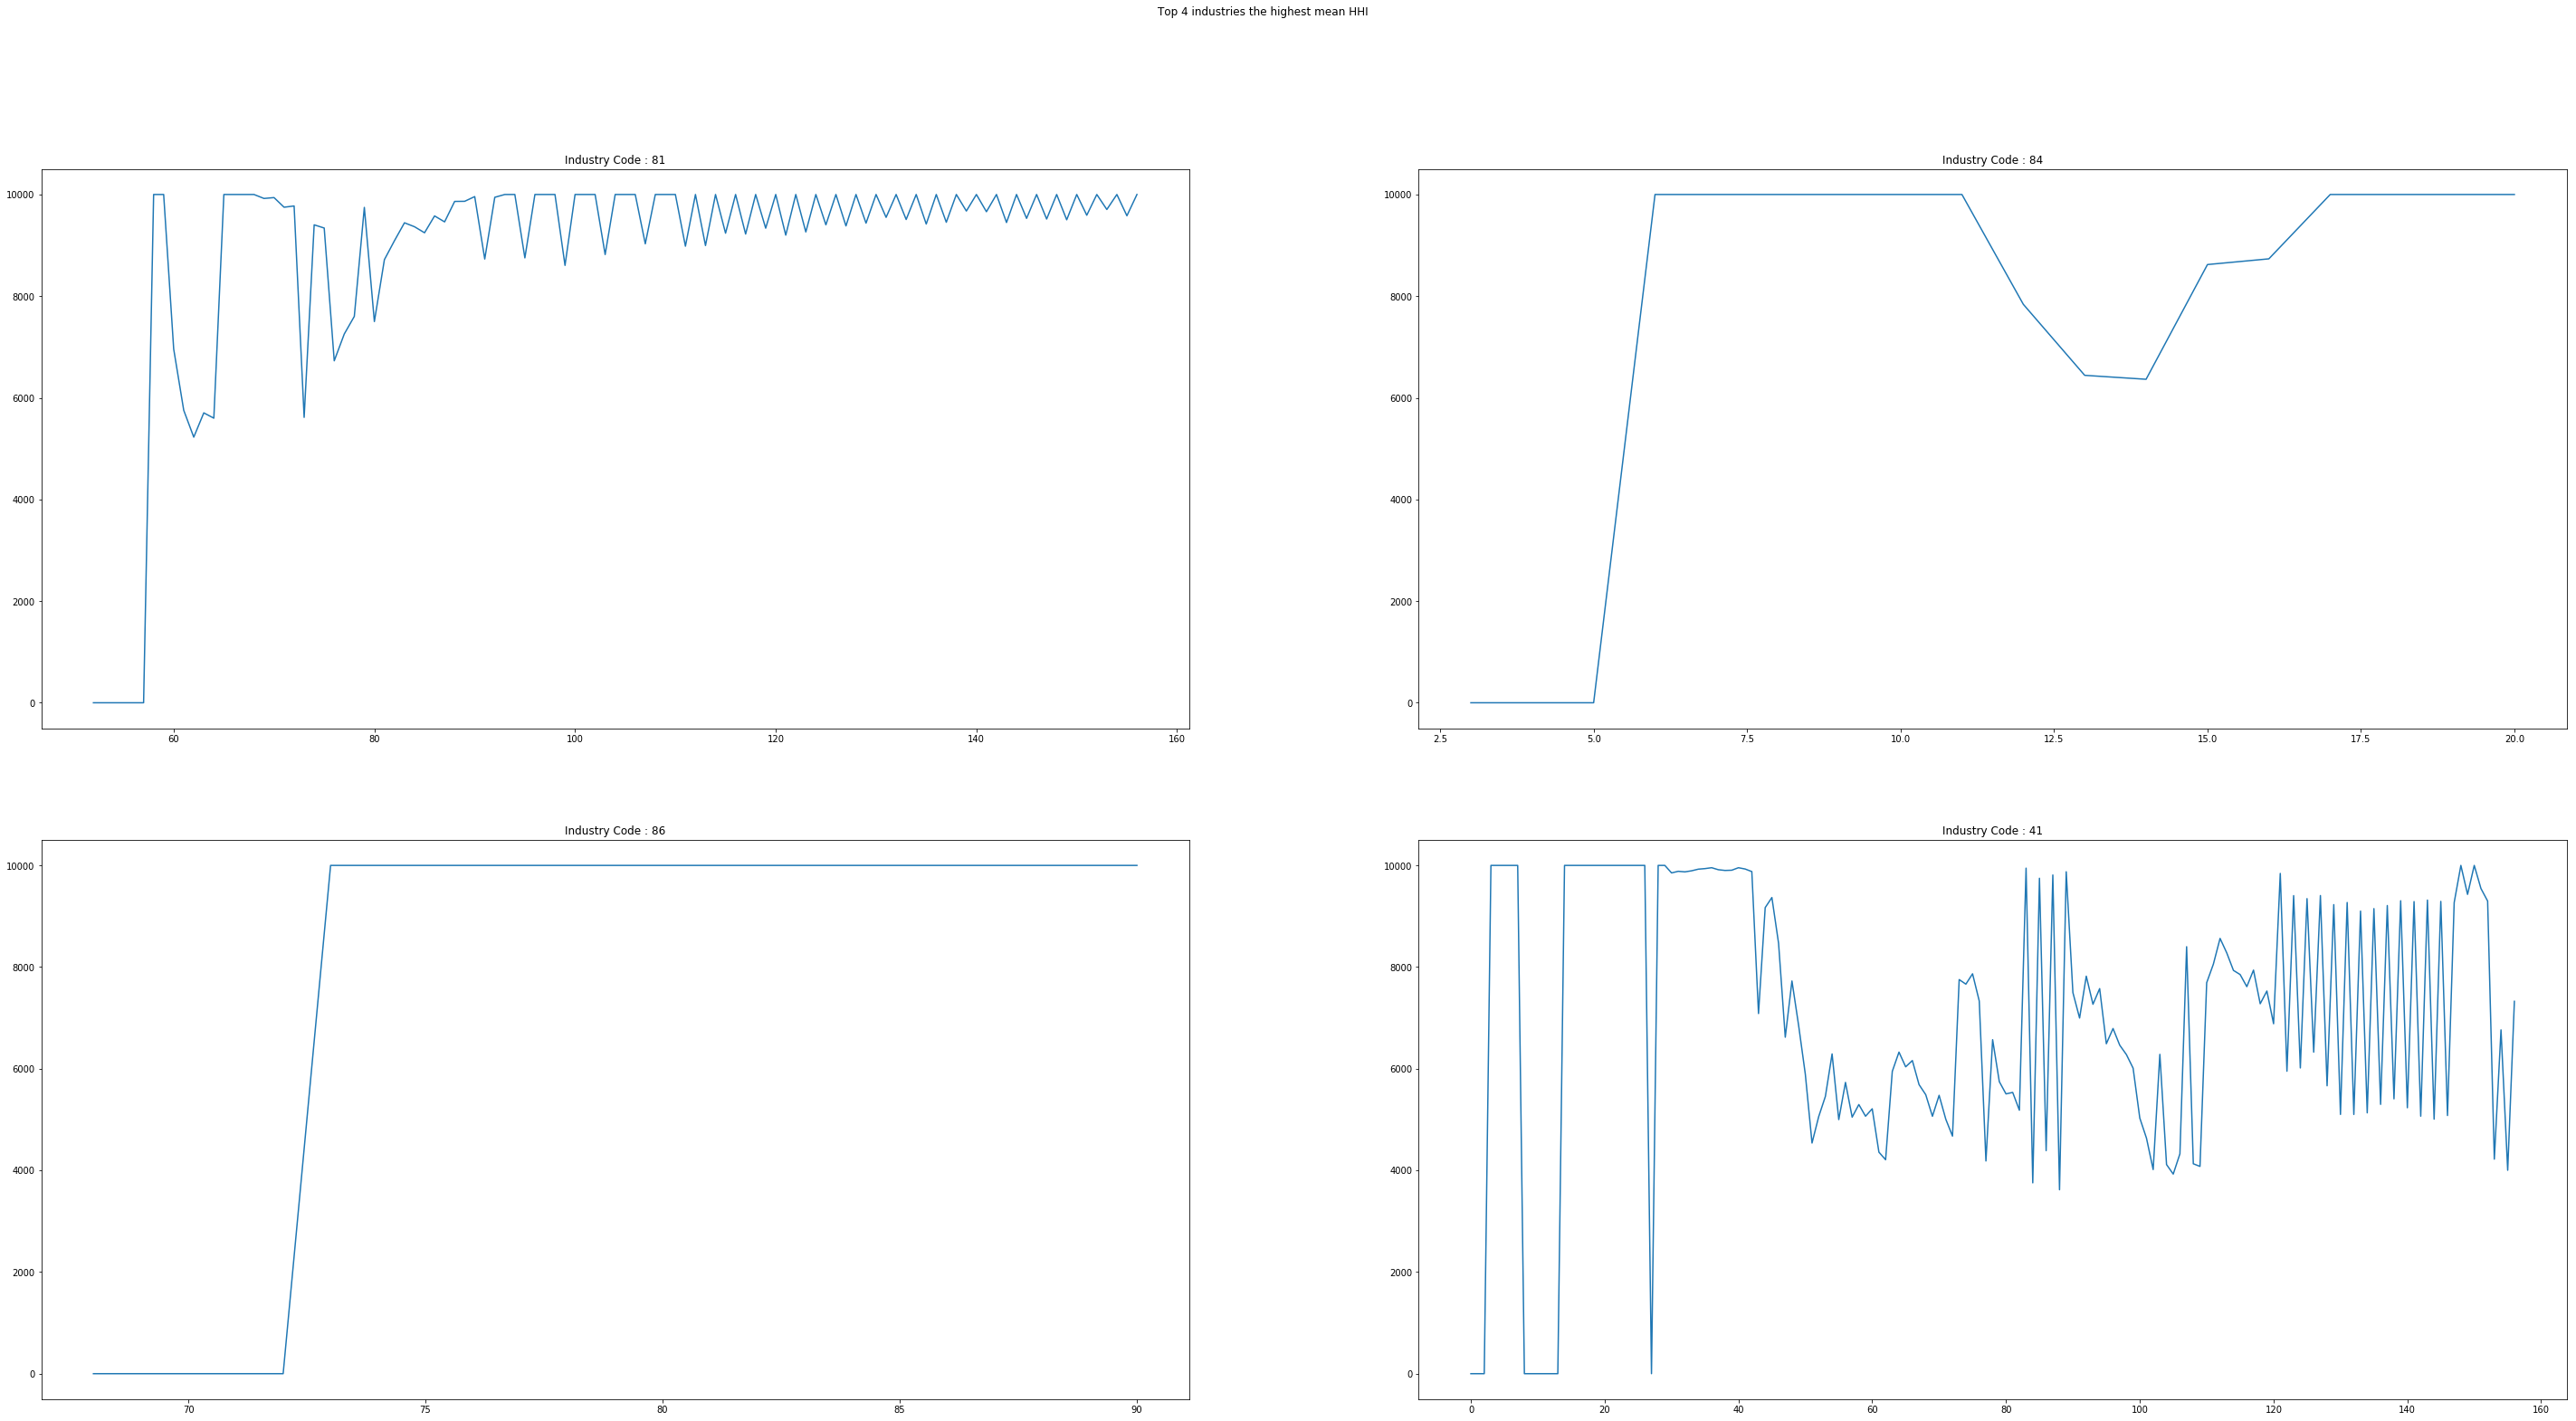

In [28]:
#plt 2*2
plt.rcParams["figure.figsize"] = (50,25)
fig, axes = plt.subplots(2,2)
pos = [(0,0),(0,1),(1,0),(1,1)]
fig.suptitle("Top 4 industries the highest mean HHI")
for i, sic in enumerate(sic_list):   
    axes[pos[i][0], pos[i][1]].plot(df_pivot.index, df_pivot[[sic]])
    axes[pos[i][0], pos[i][1]].set_title(label='Industry Code : '+sic)
plt.show()